# Day 61 – NLP Text Preprocessing: Stopwords, POS Tagging, NER & WordCloud

---

## Introduction

After learning the fundamentals of NLP such as **tokenization**, **stemming**, and **lemmatization**, today I’ll move one step further into **text understanding and analysis**.

In this notebook, I’ll explore how to:
- Remove **unnecessary words** (stopwords)
- Identify **grammatical structure** (POS tagging)
- Recognize **important names and entities** (NER)
- Visualize **frequent words** using a **WordCloud**

These techniques are essential before applying machine learning or deep learning models in NLP.

---

## Stopwords

**Stopwords** are common words in any language that carry **little or no significant meaning** for text analysis.

Examples include:  
`["is", "am", "are", "was", "the", "and", "of", "in", "on", "a", "to"]`

When processing text, these words often **don’t add much value** to understanding the context.  
Hence, we remove them to make analysis faster and more meaningful.

### Why Remove Stopwords?

- They occur **very frequently** and dominate the dataset.  
- They **do not contribute** to the semantic meaning of the text.  
- Removing them helps models focus on **keywords** that carry real meaning.  

Example:  
> Sentence: “The sun rises in the east.”  
> After removing stopwords: “sun rises east”


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [3]:
len(stopwords.words('english')) 

198

In [4]:
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [5]:
len(stopwords.words('french'))

157

In [6]:
print(stopwords.words('german'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

In [7]:
len(stopwords.words('german'))

232

In [8]:
text = 'She was running to the store, and he saw her but was too far away to catch up.'
text_tokens = word_tokenize(text)
print(text_tokens)

['She', 'was', 'running', 'to', 'the', 'store', ',', 'and', 'he', 'saw', 'her', 'but', 'was', 'too', 'far', 'away', 'to', 'catch', 'up', '.']


In [9]:
stop_words_set = set(stopwords.words('english'))
stopwords_in_sentence = []
for word in text_tokens:
    if word.lower() in stop_words_set:
        stopwords_in_sentence.append(word)
print(stopwords_in_sentence)

['She', 'was', 'to', 'the', 'and', 'he', 'her', 'but', 'was', 'too', 'to', 'up']


In [10]:
filtered_tokens = []
for word in text_tokens:
    # Only append the word if its lowercase version is NOT in the stop words set
    if word.lower() not in stop_words_set:
        filtered_tokens.append(word)

sentence_without_stopwords = " ".join(filtered_tokens)

In [11]:
print('Stop Words from the Sentence:\n',stopwords_in_sentence)
print('Tokens Without Stop Words:\n',filtered_tokens)
print('Cleaned Sentence:\n',sentence_without_stopwords)

Stop Words from the Sentence:
 ['She', 'was', 'to', 'the', 'and', 'he', 'her', 'but', 'was', 'too', 'to', 'up']
Tokens Without Stop Words:
 ['running', 'store', ',', 'saw', 'far', 'away', 'catch', '.']
Cleaned Sentence:
 running store , saw far away catch .


---

## Part-of-Speech (POS) Tagging

**POS Tagging** (Part-of-Speech Tagging) means assigning each word in a sentence a label that represents its **grammatical role** — such as noun, verb, adjective, etc.


### Example

| Word | POS Tag | Meaning |
|-------|----------|----------|
| The | DT | Determiner |
| dog | NN | Noun |
| runs | VBZ | Verb |
| fast | RB | Adverb |


### Why is POS Tagging Important?

- Helps understand the **structure and meaning** of a sentence.  
- Used in **named entity recognition**, **text summarization**, and **sentiment analysis**.  
- Helps distinguish words with multiple meanings depending on context.  

Example:  
> “Play” can be a **noun** (“the play was good”) or a **verb** (“kids play outside”).  
> POS tagging helps models understand this difference.

### How POS Tagging Works

POS tagging uses **linguistic rules** and sometimes **statistical models** to determine each word’s function.  
Libraries like **NLTK** and **spaCy** have built-in taggers trained on large corpora such as the **Penn Treebank**.

In [12]:
sent = 'sam is a natural when it comes to drawing'
sent_tokens = word_tokenize(sent)
sent_tokens

['sam', 'is', 'a', 'natural', 'when', 'it', 'comes', 'to', 'drawing']

In [13]:
for token in sent_tokens:
    print(nltk.pos_tag([token]))

[('sam', 'NN')]
[('is', 'VBZ')]
[('a', 'DT')]
[('natural', 'JJ')]
[('when', 'WRB')]
[('it', 'PRP')]
[('comes', 'VBZ')]
[('to', 'TO')]
[('drawing', 'VBG')]


In [14]:
sent2 = 'john is eating a delicious cake'
sent2_tokens = word_tokenize(sent2)

for token in sent2_tokens:
    print(nltk.pos_tag([token]))

[('john', 'NN')]
[('is', 'VBZ')]
[('eating', 'VBG')]
[('a', 'DT')]
[('delicious', 'JJ')]
[('cake', 'NN')]


---

## Named Entity Recognition (NER)

**NER (Named Entity Recognition)** is a crucial NLP task where we identify and classify **named entities** in text — like **people, organizations, locations, dates, times, quantities**, etc.


### Example

> “Elon Musk is the CEO of Tesla, which is based in the United States.”

| Entity | Type |
|--------|------|
| Elon Musk | PERSON |
| Tesla | ORGANIZATION |
| United States | LOCATION |

### Why is NER Important?

- Helps extract **meaningful information** from large text data.  
- Useful in **news categorization**, **information retrieval**, **question answering**, and **chatbots**.  
- A key step in making raw text **machine-understandable**.




In [15]:
from nltk import ne_chunk

In [16]:
NE_sent = 'The US president stays in the WHITEHOUSE '

In [17]:
NE_tokens = word_tokenize(NE_sent)
NE_tokens

['The', 'US', 'president', 'stays', 'in', 'the', 'WHITEHOUSE']

In [18]:
NE_tags = nltk.pos_tag(NE_tokens)
NE_tags

[('The', 'DT'),
 ('US', 'NNP'),
 ('president', 'NN'),
 ('stays', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('WHITEHOUSE', 'NNP')]

In [19]:
NE_NER = ne_chunk(NE_tags)
print(NE_NER)

(S
  The/DT
  (GSP US/NNP)
  president/NN
  stays/NNS
  in/IN
  the/DT
  (ORGANIZATION WHITEHOUSE/NNP))


---

## WordCloud

A **WordCloud** is a visual representation of text data where the **size of each word** indicates its **frequency** or **importance** in the text.


### Why Use WordCloud?

- Gives a **quick visual summary** of dominant terms.  
- Useful for **exploratory data analysis (EDA)** in NLP projects.  
- Helps identify **important themes** in large documents.


### How It Works

- The text is tokenized and cleaned.  
- The most frequent words are displayed in larger font size.  
- Optional: Stopwords can be excluded for a cleaner result.


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
text

'Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble'

In [27]:
wordcloud = WordCloud(width=420, height=200, margin=2, background_color='black', colormap='Accent', mode='RGBA').generate(text)

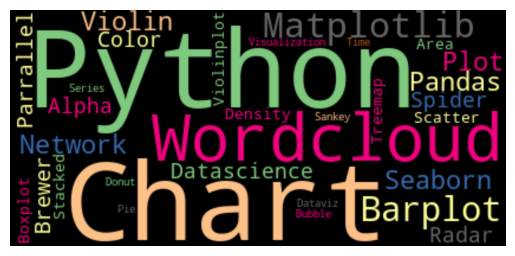

In [28]:
plt.imshow(wordcloud, interpolation='quadric')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

---
## Conclusion

In this notebook, I explored key **text preprocessing and understanding techniques** in NLP:
- **Stopwords**: Removed unnecessary words to focus on meaningful terms.  
- **POS Tagging**: Labeled words with their grammatical roles.  
- **NER**: Extracted named entities like names, locations, and organizations.  
- **WordCloud**: Visualized frequently used words for quick insight.

These steps help machines better understand **context and meaning** in text data — forming the foundation for tasks like **text classification, sentiment analysis, and summarization**.


## Key Takeaways

- **Stopwords** removal cleans the text for meaningful analysis.  
- **POS Tagging** identifies grammatical structure and helps in advanced NLP tasks.  
- **NER** helps extract real-world information like names and places.  
- **WordClouds** are powerful tools for quick visual insights.  
- Together, these methods enhance the **quality and interpretability of text data** for NLP models.

---
